In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from lightgbm import LGBMClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

'''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# Any results you write to the current directory are saved as output.

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
data = pd.read_csv('./creditcardfraud/creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
def metrics(pred, y_test):
    precision = precision_score(pred, y_test)
    recall = recall_score(pred, y_test)
    f1 = f1_score(pred, y_test)
    roc = roc_auc_score(pred, y_test)
    acc = accuracy_score(pred, y_test)
    print(f"acc : {acc}, f1 : {f1}")
    print(f"precision : {precision}, recall : {recall}, roc : {roc}")

In [5]:
def get_train_test_data(data):
    X = data.drop('Class', axis = 1)
    y = data['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    return X_train, X_test, y_train, y_test

In [6]:
def modeling(model, X_train, X_test, y_train, y_test):
    print(model.__class__.__name__, " training")
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    metrics(pred, y_test)
    print("**end**")

In [7]:
X_train, X_test, y_train, y_test = get_train_test_data(data)

In [8]:
lr = LogisticRegression()
lgbm = LGBMClassifier(boost_from_average=False)

In [9]:
modeling(lr, X_train, X_test, y_train, y_test)
modeling(lgbm, X_train, X_test, y_train, y_test)

LogisticRegression  training


d:\anaconda3\envs\soojin\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


acc : 0.9989466661985184, f1 : 0.6875
precision : 0.6470588235294118, recall : 0.7333333333333333, roc : 0.8663501664556665
**end**
LGBMClassifier  training
acc : 0.9995435553526912, f1 : 0.8612099644128114
precision : 0.7908496732026143, recall : 0.9453125, roc : 0.9724687097081404
**end**


let's try to normalization  

i dont know columns about v1 ~ v28.  
so, i focus on Amount, Time columns  

In [10]:
def draw_graph(data_copy, feature1, feature2):
    fig, ax = plt.subplots(1, 2, figsize=(18, 4))
    feature1_val = data_copy[feature1].values
    feature2_val = data_copy[feature2].values
    
    sns.distplot(feature1_val, ax = ax[0], color = 'r')
    ax[0].set_title(f'distribution of transation {feature1}')
    ax[0].set_xlim([min(feature1_val), max(feature1_val)])
    
    sns.distplot(feature2_val, ax = ax[1], color='b')
    ax[1].set_title(f'distribution of transaction {feature2}')
    ax[1].set_xlim([min(feature2_val), max(feature2_val)])
    plt.show()

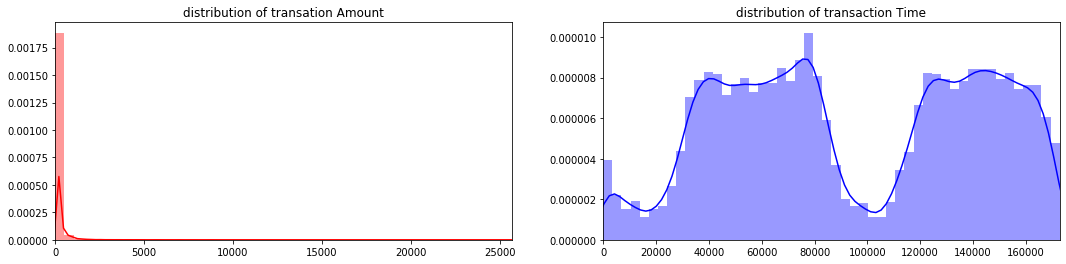

In [11]:
draw_graph(data, 'Amount', 'Time')

data ragne is to loooooooooooooong  
so, lets doing normalization

In [12]:
scaler = StandardScaler()
data['scaled_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['loged_amount'] = np.log1p(data['Amount'].values.reshape(-1, 1))

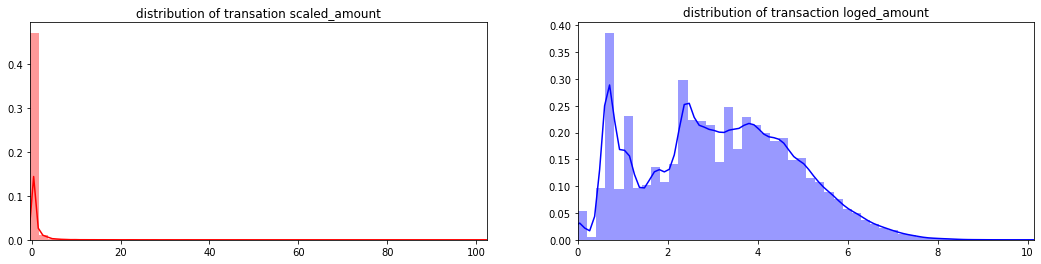

In [13]:
draw_graph(data, 'scaled_amount', 'loged_amount')

scaled_amount is shows a very similar graph to the Amount   

next, doing Time column

In [14]:
rob_scaler = RobustScaler()

In [15]:
data['scaled_time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))
data['rob_scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1, 1))

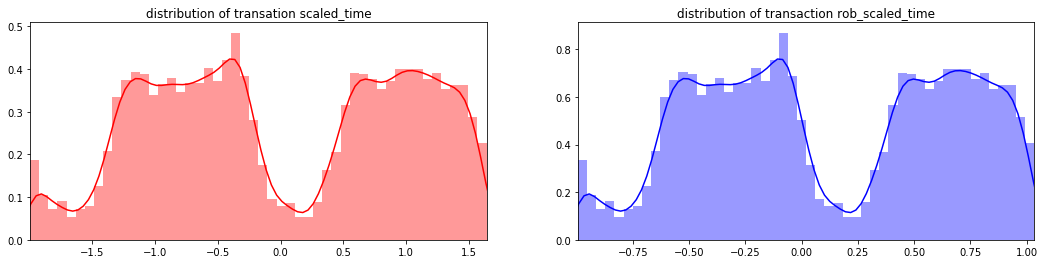

In [16]:
draw_graph(data, 'scaled_time', 'rob_scaled_time')

both graphs are similar.  
but, i use robust because the range is more short

In [17]:
data.columns[20:]

Index(['V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'scaled_amount', 'loged_amount', 'scaled_time',
       'rob_scaled_time'],
      dtype='object')

In [18]:
data.drop(['Amount', 'Time', 'loged_amount', 'scaled_time'], axis = 1, inplace = True)

In [19]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,rob_scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-0.994960


In [20]:
scaled_amount = data['scaled_amount']
rob_scaled_time = data['rob_scaled_time']
data.drop(['scaled_amount', 'rob_scaled_time'], axis = 1, inplace = True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'rob_scaled_time', rob_scaled_time)

In [21]:
data.head()

,scaled_amount,rob_scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [22]:
X_train, X_test, y_train, y_test = get_train_test_data(data)
modeling(lr, X_train, X_test, y_train, y_test)
modeling(lgbm, X_train, X_test, y_train, y_test)

LogisticRegression  training


d:\anaconda3\envs\soojin\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


acc : 0.999133925541004, f1 : 0.7218045112781956
precision : 0.6193548387096774, recall : 0.8648648648648649, roc : 0.9320867239057367
**end**
LGBMClassifier  training
acc : 0.9996137776061234, f1 : 0.8858131487889274
precision : 0.8258064516129032, recall : 0.9552238805970149, roc : 0.9774536920480299
**end**


remove outlier use IQR

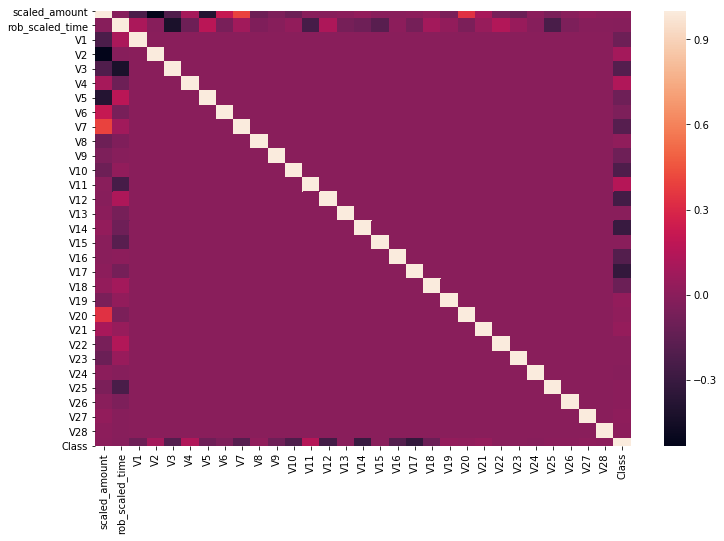

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr())

V14, V17 shows a negative corr compare with Class column

In [24]:
def draw_boxplots(data, x_col, y_col_1, y_col_2):
    f, axs = plt.subplots(1, 2, figsize=(15, 8))
    sns.boxplot(x = x_col, y = y_col_1, data = data, ax = axs[0])
    sns.boxplot(x = x_col, y = y_col_2, data = data, ax = axs[1])
    axs[0].set_title(f'{x_col} VS {y_col_1}')
    axs[1].set_title(f'{x_col} VS {y_col_2}')
    plt.show()
    
    

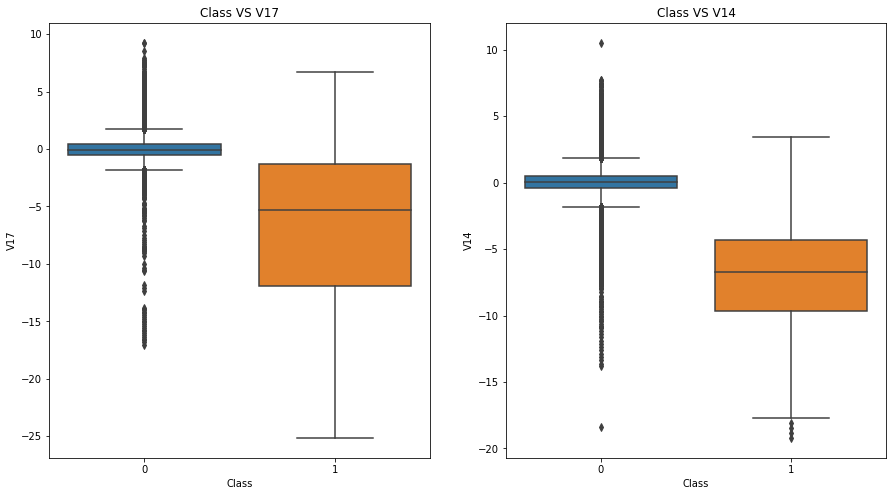

In [25]:
draw_boxplots(data, 'Class', 'V17', 'V14')

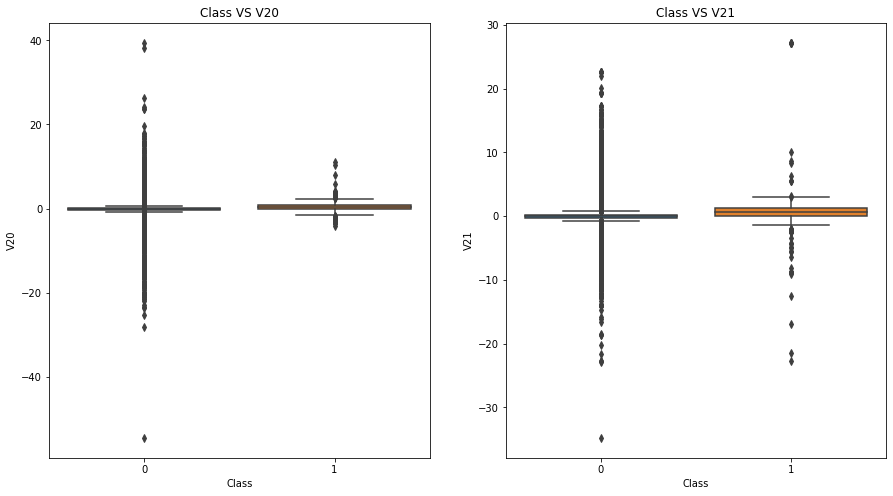

In [26]:
draw_boxplots(data, 'Class', 'V20', 'V21')

The columns v14, v17 are certainly relevant to class

so, i drop outlier data based on V14, V17 columns

In [27]:
def remove_outlier_data(data, column):
    fraud_column_data = data[data['Class']==0][column]
    quan_25 = np.percentile(fraud_column_data, 25)
    quan_75 = np.percentile(fraud_column_data, 75)
    IQR = (quan_75 - quan_25) * 1.5
    max_v = quan_75 + IQR
    min_v = quan_25 - IQR
    outlier_index = fraud_column_data[(fraud_column_data < min_v) | (fraud_column_data > max_v)].index
    data.drop(outlier_index, axis = 0, inplace = True)
    return data

In [28]:
data.head()

,scaled_amount,rob_scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [29]:
remove_outlier_data = remove_outlier_data(data, 'V14')
X_train, X_test, y_train, y_test = get_train_test_data(remove_outlier_data)

In [30]:
print(remove_outlier_data.shape)

(271007, 31)


In [31]:
lr = LogisticRegression()
lgb = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average = False)

In [32]:
modeling(lr, X_train, X_test, y_train, y_test)
modeling(lgb, X_train, X_test, y_train, y_test)

LogisticRegression  training


d:\anaconda3\envs\soojin\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


acc : 0.999631009925833, f1 : 0.8972602739726028
precision : 0.81875, recall : 0.9924242424242424, roc : 0.9960334859852544
**end**
LGBMClassifier  training
acc : 0.9996187102566941, f1 : 0.8949152542372882
precision : 0.825, recall : 0.9777777777777777, roc : 0.9887164071226757
**end**
